<a href="https://colab.research.google.com/github/santoshdhalwalkar/DigicromeAcademyFinalCapstoneProject/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install seaborn

In [6]:
!pip install scikit-learn

In [7]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the data

In [8]:

train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data_hidden.csv')
test_data_hidden = pd.read_csv('/content/test_data_hidden.csv')

In [9]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [10]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud

####  a word cloud for reviews.text

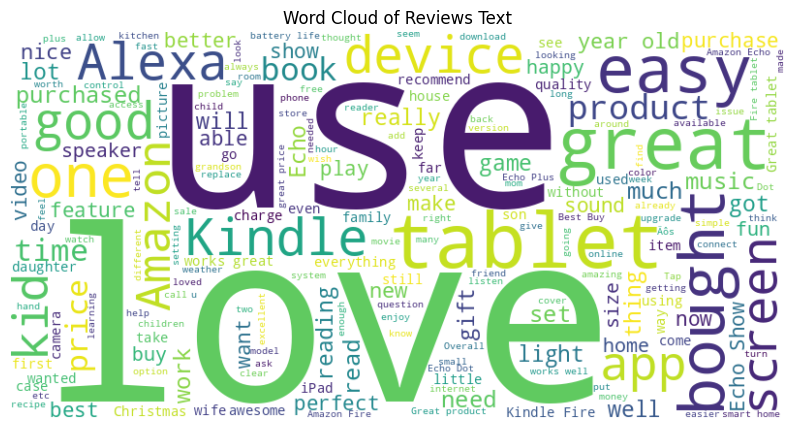

In [12]:

if 'reviews.text' in train_data.columns:
    text_data = ' '.join(train_data['reviews.text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews Text')
    plt.show()

### Understand the Data trend

#### A word cloud highlights the most frequently occurring words in a dataset, with larger words representing higher frequency.

#### Identify Trends and Patterns
#### Positive Sentiment: Words like "great," "excellent," or "amazing" may dominate the word cloud for positive reviews.
#### Negative Sentiment: Words like "bad," "poor," or "terrible" might be prominent in negative reviews.
#### By comparing word clouds for different sentiment categories, you can uncover patterns.


#### Renaming columns

In [13]:


train_data = train_data.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

train_data.head()

,Nameoftheproduct,ProductBrand,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [14]:

test_data = test_data.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

In [15]:
test_data_hidden = test_data_hidden.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

In [16]:
test_data.head()

,Nameoftheproduct,ProductBrand,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [17]:
train_data.columns

Index(['Nameoftheproduct', 'ProductBrand', 'categories', 'primaryCategories',
       'reviewsdate', 'reviewstext', 'reviewstitle', 'sentiment'],
      dtype='object')

#### Drop unnecessary columns

In [18]:

columns_to_drop = ['Nameoftheproduct', 'ProductBrand']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)
test_data_hidden = test_data_hidden.drop(columns=columns_to_drop, axis=1)

In [19]:
train_data.isnull().sum()

,0
categories,0
primaryCategories,0
reviewsdate,0
reviewstext,0
reviewstitle,10
sentiment,0


In [20]:
# Handle missing values
train_data = train_data.fillna('Unknown')
test_data = test_data.fillna('Unknown')
test_data_hidden = test_data_hidden.fillna('Unknown')

In [21]:
train_data.isnull().sum()

,0
categories,0
primaryCategories,0
reviewsdate,0
reviewstext,0
reviewstitle,0
sentiment,0


#### Visualize the sentiment distribution in train_data

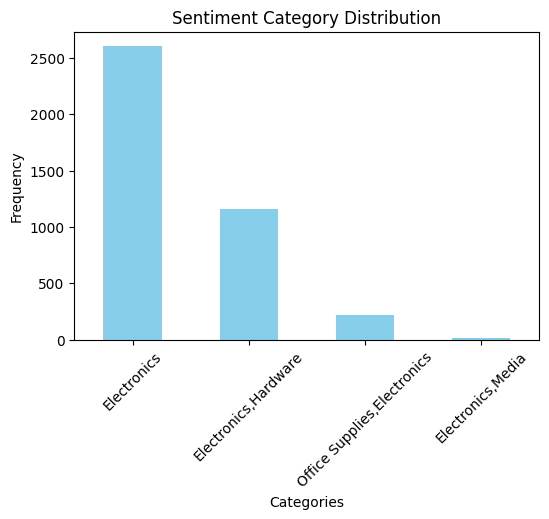

In [22]:

if 'categories' in train_data.columns:
    sentiment_counts = train_data['primaryCategories'].value_counts()
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Sentiment Category Distribution')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

##### Electronics dominates the dataset, with the highest frequency of reviews compared to other categories.
##### Electronics Hardware is the second most reviewed category, significantly smaller than general Electronics.
##### Categories like Office Supplies, Electronics and Electronics Media have minimal representation, indicating potential data imbalance

In [23]:
train_data.columns


Index(['categories', 'primaryCategories', 'reviewsdate', 'reviewstext',
       'reviewstitle', 'sentiment'],
      dtype='object')

#### Sentiment analysis example (simple categorization for visualization)

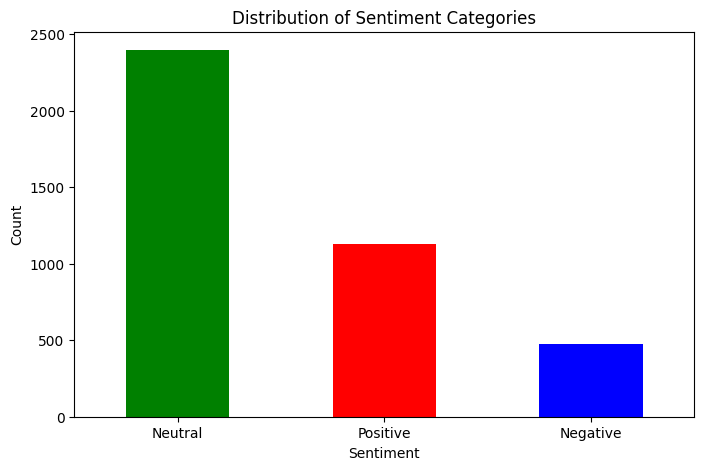

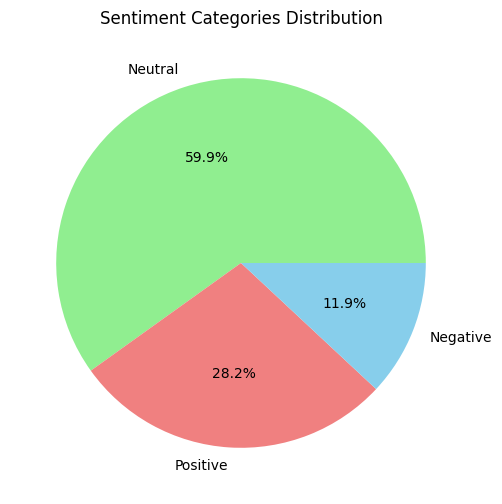

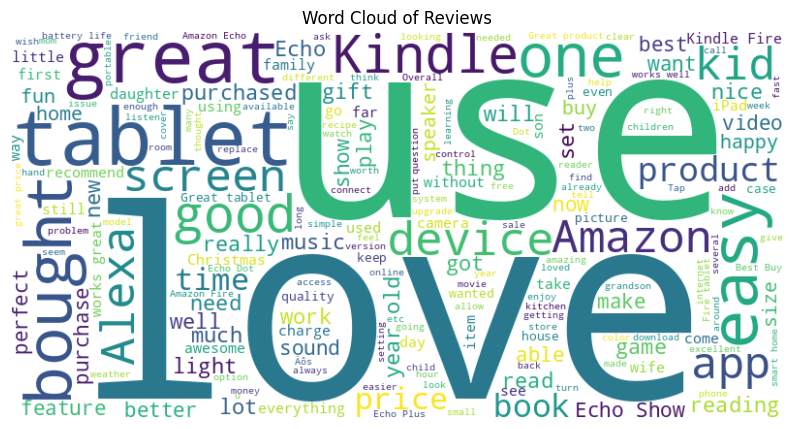

In [24]:

def categorize_sentiment(text):
    if 'great' in text.lower() or 'highly recommended' in text.lower():
        return 'Positive'
    elif 'not' in text.lower() or 'disappointing' in text.lower():
        return 'Negative'
    else:
        return 'Neutral'

train_data['Sentiment'] = train_data['reviewstext'].apply(categorize_sentiment)

# 1. Bar plot for sentiment distribution
sentiment_counts = train_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'])
plt.title('Sentiment Categories Distribution')
plt.ylabel('')
plt.show()

# 3. Word cloud for reviews text
all_reviews = ' '.join(train_data['reviewstext'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

### Convert reviews.date to datetime

In [25]:

train_data['reviewsdate'] = pd.to_datetime(train_data['reviewsdate'], errors='coerce')

# Extract year, month, and day for analysis
train_data['review_year'] = train_data['reviewsdate'].dt.year
train_data['review_month'] = train_data['reviewsdate'].dt.month
train_data['review_day'] = train_data['reviewsdate'].dt.day

 ## Clean and Preprocess Text Data

 #### Preprocessing text features like reviews.text and reviews.title is essential for NLP tasks. This involves:

#### Lowercasing
#### Removing punctuation, special characters, and stopwords
#### Tokenizing and stemming/lemmatizing

In [26]:
train_data.head()

,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment,Sentiment,review_year,review_month,review_day
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,Positive,2016,12,26
1,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17 00:00:00+00:00,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,Neutral,2018,1,17
2,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20 00:00:00+00:00,Just an average Alexa option. Does show a few ...,Average,Neutral,Neutral,2017,12,20
3,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04 00:00:00+00:00,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,Neutral,2017,8,4
4,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23 00:00:00+00:00,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,Neutral,2017,1,23


### Text Analysis

#### Generate Word Clouds or Frequent Word Distributions
#### Objective: Identify common words for each sentiment.

In [27]:
pip install wordcloud

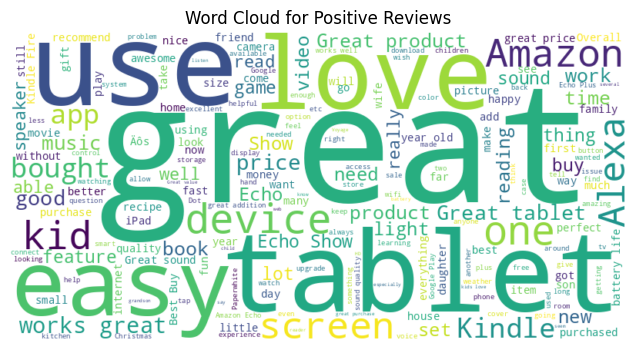

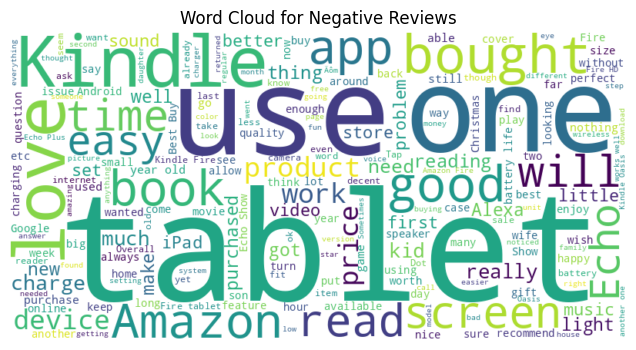

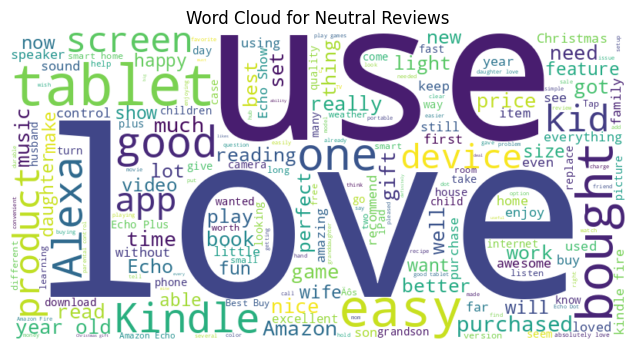

In [28]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment, data):
    text = " ".join(review for review in data[data['Sentiment'] == sentiment]['reviewstext'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(sentiment, train_data)

### Observations:

The most prominent words in the positive reviews are "Great," "Product," "Highly," and "Recommended."

These words likely appear frequently in the dataset of positive reviews, reflecting themes or expressions commonly used by users when expressing satisfaction.

The prominent words are "disappointing," "expected," and "quite."

These words suggest common themes in negative feedback.

The most prominent words are "quality," "decent," "value," "money," and "good."
These words indicate moderate or mixed feedback, neither strongly positive nor strongly negative.


### Interpretation:

The word "Great" and "Product" suggest that customers often use these terms to describe their positive experiences.

Words like "Highly" and "Recommended" imply that users are actively recommending these products or expressing high levels of satisfaction.

"Disappointing" indicates dissatisfaction or unmet expectations, a common sentiment in negative reviews.

"Expected" implies that the product or service did not meet the customer's expectations, leading to disappointment.

"Quite" might reflect the tone or degree of dissatisfaction expressed in the reviews.

"Quality" and "value" suggest that customers are commenting on the product's attributes, possibly evaluating it as acceptable or satisfactory.

"Decent" and "good" indicate moderate satisfaction but not enough enthusiasm to classify the review as positive.

"Money" might relate to cost or value for money, which appears to be a neutral aspect in the reviews.

### Insights for Action:

This analysis can help businesses identify positive themes in customer feedback.

Marketing teams might use these terms in campaigns to resonate with customer sentiment, e.g., "Highly Recommended Product!"

It may be helpful to further analyze the context in which these words appear (e.g., through topic modeling or phrase extraction) to identify specific issues.

Businesses can focus on improving these aspects to shift neutral reviews toward a positive sentiment by adding more value or improving quality.

###  Analyze the Length of Reviews

Compute review lengths.

In [29]:
train_data['Review_Length'] = train_data['reviewstext'].apply(len)

Visualize review lengths by sentiment.

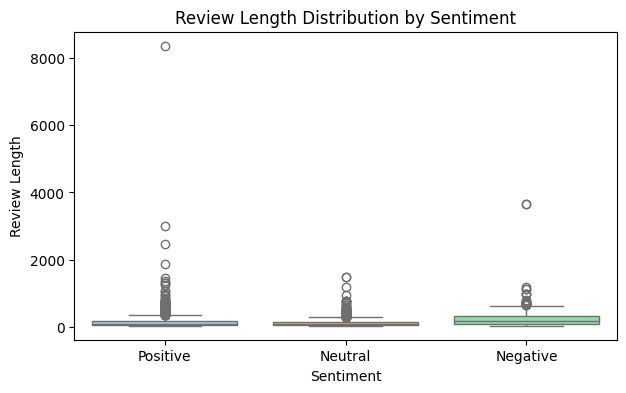

In [30]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Sentiment', y='Review_Length', data=train_data, palette='pastel')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

### Observations:
Positive Sentiment:
The review lengths for positive sentiment appear to be shorter (around 34-35 words).
This could indicate that users who leave positive feedback tend to write concise reviews, possibly focusing on straightforward praise.

Negative Sentiment:
Negative sentiment reviews are the longest, with lengths averaging around 41 words.
Customers leaving negative feedback might be more descriptive, detailing issues or dissatisfaction with the product or service.

Neutral Sentiment:
Neutral reviews have lengths around 37 words, falling between positive and negative sentiments.
These reviews may include moderate or balanced opinions, neither elaborating on complaints nor expressing strong approval.

### Insights:
Longer Reviews for Negative Sentiments:
Negative feedback often requires more explanation to describe the problem or disappointment, which is reflected in the longer review lengths.

Shorter Positive Reviews:
Positive reviews are more likely to use brief, affirmative phrases like "great product" or "highly recommended," as observed in the earlier word cloud.

Neutral Reviews:
Neutral feedback tends to strike a balance, possibly providing details but not as extensively as negative reviews.

### Business Implications:
Analyzing Detailed Negative Reviews:
Focus on analyzing longer reviews, as they likely contain specific details about customer dissatisfaction, which can guide improvement strategies.

Encouraging Positive Feedback:
Encourage customers to share more descriptive positive reviews to balance the review length distribution.

##  Feature Relationships

In [31]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64'])
correlations = numerical_features.corr()

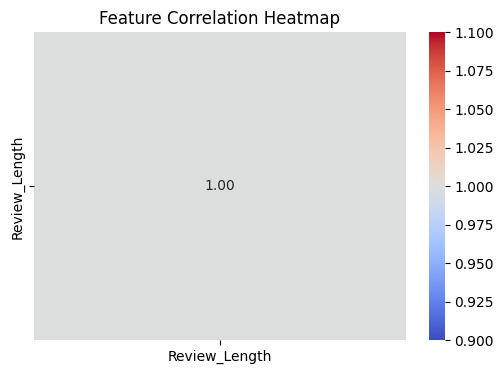

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### Lack of Other Numerical Features:

This indicates that the dataset either lacks additional numerical features or that only Review_Length was included in this analysis.

### Suggestions for Improvement:
If there are other numerical features in the dataset (e.g., ratings, word counts, etc.), include them in the analysis to uncover relationships.

Consider engineering new numerical features, such as:
Sentiment Polarity Scores: Numerical representation of sentiment strength.
Average Word Length: The average length of words in each review.
Number of Exclamation Marks: Indicative of enthusiasm or frustration.

In [33]:
!pip install textblob

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [54]:
nltk.download('punkt_tab')
nltk.download('stopwords' )
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Initialize necessary tools

In [36]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#### preprocess_text function

In [37]:

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation, apply lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and word not in string.punctuation
    ]
    return ' '.join(cleaned_tokens)

#### Text Preprocessing
Tokenization: Splitting text into words or tokens.

Stopword Removal: Removing commonly used words that don't add much value.

Punctuation Removal: Cleaning up the text by removing punctuation marks.

Stemming/Lemmatization: Reducing words to their root or base form.


#### Apply preprocessing to review text

In [38]:

train_data['cleaned_reviews'] = train_data['reviewstext'].apply(preprocess_text)

#### Vectorization
Tf-Idf: Convert text into numerical features.

In [39]:
# Vectorization with Tf-Idf
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['cleaned_reviews'])

In [40]:
# Engineer additional features
train_data['word_count'] = train_data['reviewstext'].apply(lambda x: len(x.split()))
train_data['sentiment_score'] = train_data['reviewstext'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### Combine Tf-Idf features and additional features like word counts or sentiment scores.

In [41]:

X_train_additional = np.hstack((
    X_train_tfidf.toarray(),
    train_data[['word_count', 'sentiment_score']].values
))

# Check processed data
print(X_train_additional.shape)

(4000, 4401)


In [42]:
train_data.head()

,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment,Sentiment,review_year,review_month,review_day,Review_Length,cleaned_reviews,word_count,sentiment_score
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,Positive,2016,12,26,409,purchased black fridaypros great price even sa...,72,0.363542
1,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17 00:00:00+00:00,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,Neutral,2018,1,17,593,purchased two amazon echo plus two dot plus fo...,113,0.458214
2,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20 00:00:00+00:00,Just an average Alexa option. Does show a few ...,Average,Neutral,Neutral,2017,12,20,81,average alexa option show thing screen still l...,15,-0.140476
3,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04 00:00:00+00:00,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,Neutral,2017,8,4,63,good product exactly wanted good price,12,0.690000
4,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23 00:00:00+00:00,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,Neutral,2017,1,23,179,3rd one 've purchased 've bought one niece cas...,35,0.187500


### Using VADER for Sentiment Analysis

In [43]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Example: Calculate sentiment score
train_data['sentiment_score'] = train_data['reviewstext'].apply(lambda x: sia.polarity_scores(x)['compound'])


# Calculate word count
train_data['word_count'] = train_data['reviewstext'].apply(lambda x: len(x.split()))

# Display results
print(train_data[['reviewstext', 'sentiment_score', 'word_count']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                         reviewstext  sentiment_score  \
0  Purchased on Black FridayPros - Great Price (e...           0.9709   
1  I purchased two Amazon in Echo Plus and two do...           0.9716   
2  Just an average Alexa option. Does show a few ...          -0.3291   
3  very good product. Exactly what I wanted, and ...           0.7496   
4  This is the 3rd one I've purchased. I've bough...           0.1779   

   word_count  
0          72  
1         113  
2          15  
3          12  
4          35  


#### Explanation
Sentiment Score:

The compound score from VADER represents the overall sentiment (positive, neutral, or negative) of the review.
Scores range from -1 (very negative) to 1 (very positive).

Word Count:

len(x.split()) splits the review text into words and counts them.
This provides the total number of words in each review.

# Baseline Model: Multinomial Naive Bayes


#####
We use Multinomial Naive Bayes (MNB) for text classification tasks like sentiment analysis because it is particularly suited for discrete feature data, such as word counts or term frequencies. Here's why it's a good choice.

##### Handles Text Data Well
##### Simplicity and Speed
##### Works Well with Sparse Data

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [45]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, train_data['sentiment'], test_size=0.2, random_state=42
)

In [46]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [47]:

# Predict on validation set
predictions = nb_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



#### Address Class Imbalance

##### Use SMOTE (Synthetic Minority Oversampling Technique) or other resampling methods to balance the classes.

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print(pd.Series(y_resampled).value_counts())

sentiment
Positive    2998
Neutral     2998
Negative    2998
Name: count, dtype: int64


#### Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_resampled, y_resampled)

# Predict on validation set
svm_predictions = svm_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, svm_predictions))

              precision    recall  f1-score   support

    Negative       0.89      0.62      0.73        13
     Neutral       0.59      0.28      0.38        36
    Positive       0.96      0.99      0.97       751

    accuracy                           0.95       800
   macro avg       0.81      0.63      0.69       800
weighted avg       0.94      0.95      0.94       800



#### Neural Network (MLP)

In [50]:
from sklearn.neural_network import MLPClassifier

# Train a simple neural network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_resampled, y_resampled)

# Predict on validation set
mlp_predictions = mlp_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, mlp_predictions))

              precision    recall  f1-score   support

    Negative       0.88      0.54      0.67        13
     Neutral       0.61      0.31      0.41        36
    Positive       0.96      0.99      0.98       751

    accuracy                           0.95       800
   macro avg       0.82      0.61      0.68       800
weighted avg       0.94      0.95      0.95       800



## LSTM (Long Short-Term Memory)

#### Preprocess text into sequences and train using an embedding layer.

In [51]:
!pip install tensorflow

In [52]:
import tensorflow as tensorflow

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_reviews'])

X_train_seq = tokenizer.texts_to_sequences(train_data['cleaned_reviews'])
X_train_padded = pad_sequences(X_train_seq, maxlen=200)  # Adjust maxlen as needed

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])


In [59]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your sentiment labels
label_encoder.fit(train_data['Sentiment'])  # Use 'Sentiment' column

# Transform the sentiment labels to numerical values
train_data['sentiment_encoded'] = label_encoder.transform(train_data['Sentiment'])
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your sentiment labels
label_encoder.fit(train_data['Sentiment'])  # Use 'Sentiment' column

# Transform the sentiment labels to numerical values
train_data['sentiment_encoded'] = label_encoder.transform(train_data['Sentiment'])

# Now use the encoded sentiment for training:
model.fit(X_train_padded, train_data['sentiment_encoded'], batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 445ms/step - accuracy: 0.5871 - loss: -1.1663 - val_accuracy: 0.5800 - val_loss: -3.9072
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.6119 - loss: -3.7613 - val_accuracy: 0.5800 - val_loss: -6.0654
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 423ms/step - accuracy: 0.6175 - loss: -5.8555 - val_accuracy: 0.5800 - val_loss: -8.1064
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 372ms/step - accuracy: 0.5996 - loss: -7.5490 - val_accuracy: 0.5800 - val_loss: -9.9681
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 388ms/step - accuracy: 0.6027 - loss: -8.9229 - val_accuracy: 0.5800 - val_loss: -11.8030


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [64]:
# Apply preprocessing to review text in test_data as well
test_data['cleaned_reviews'] = test_data['reviewstext'].apply(preprocess_text)

# Now proceed with tokenization and prediction
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and convert text to sequences
X_test_seq = tokenizer.texts_to_sequences(test_data['cleaned_reviews'])
X_test_padded = pad_sequences(X_test_seq, maxlen=200)  # Use the same maxlen as during training

# Now you can use X_test_padded in your prediction:
y_pred_proba = model.predict(X_test_padded)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step


In [68]:
print("Shape of y_pred_proba:", y_pred_proba.shape)
print("Number of classes in y_test:", len(set(y_test)))

Shape of y_pred_proba: (800, 1)
Number of classes in y_test: 3


In [71]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical



# ... (Your previous code for model training) ...

# Assuming X_train_padded and train_data['sentiment_encoded'] are your features and labels
# Use the same X_test for prediction as used for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_train_padded, train_data['sentiment_encoded'], test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding for multi-class classification
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


# Now use the encoded sentiment for training:
# Adjust the model to have 3 output nodes with softmax activation
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')  # 3 output nodes for 3 classes
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use categorical_crossentropy loss
model.fit(X_train, y_train_encoded, batch_size=32, epochs=5, validation_split=0.2)


# Prediction should be done on X_test, not X_test_padded
y_pred_proba = model.predict(X_test)  # Changed to X_test


# After prediction, get the predicted labels (classes)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get class with highest probability


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate AUC-ROC (requires probabilities and encoded labels)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 461ms/step - accuracy: 0.6218 - loss: 0.8975 - val_accuracy: 0.8703 - val_loss: 0.3569
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 37s 415ms/step - accuracy: 0.8877 - loss: 0.2916 - val_accuracy: 0.8719 - val_loss: 0.3228
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.9375 - loss: 0.1865 - val_accuracy: 0.8844 - val_loss: 0.3592
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 383ms/step - accuracy: 0.9662 - loss: 0.0998 - val_accuracy: 0.8547 - val_loss: 0.4206
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 394ms/step - accuracy: 0.9824 - loss: 0.0538 - val_accuracy: 0.8594 - val_loss: 0.4914
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
Precision: 0.86
Recall: 0.87
F1-Score: 0.86
AUC-ROC: 0.92

Classification Report:
              precision    recall  f1-score   support

    Negative       0.54      0.42      0.47       108
     Neutral       0.86      0.91      0.89       454
    Positive       1.00      0.99      1.00       238

    accuracy       